# ЗАНЯТИЕ 4. Основы Python: стандартные библиотеки[1]

[1] <span>&#9757;&#128578;</span> Данное занятие разработано на основе официальной документации `Python` (источник [8]).

## Цели занятия

Получение представления о функциональности стандартных модулей/библиотек, поставляемых совместно с интерпретатором `Python`. Изучение основных принципов практической работы с ними.

## Порядок выполнения работы

### Интерфейс операционной системы

Модуль «`os`» предоставляет большое количество функций для взаимодействия с операционной системой, т.е. позволяет осуществлять вызов системных команд, например, таких как получение полного пути к текущему каталогу, из которого выполняется программа, смена каталога, его удаление и многое другое. Ниже приведено три примера:

In [1]:
import os  
  
print (os.getcwd()) # Вернуть (получить) текущий рабочий каталог  
os.system('mkdir today') # Запускаем команду mkdir в системной оболочке  
os.chdir('./today') # Изменить текущий рабочий каталог (перейти в созданную папку)  
print (os.getcwd())  
  
os.chdir('../')  
os.rmdir('today') #удалить созданную папку  
print (os.getcwd())  

C:\Users\pavel\Desktop\Python для аналитики данных (блокноты)\МОДУЛЬ 1. Python для анализа данных. Основы и инструменты\ЗАНЯТИЕ 4. Стандартные библиотеки
C:\Users\pavel\Desktop\Python для аналитики данных (блокноты)\МОДУЛЬ 1. Python для анализа данных. Основы и инструменты\ЗАНЯТИЕ 4. Стандартные библиотеки\today
C:\Users\pavel\Desktop\Python для аналитики данных (блокноты)\МОДУЛЬ 1. Python для анализа данных. Основы и инструменты\ЗАНЯТИЕ 4. Стандартные библиотеки


Обязательно используйте `«import os»` вместо `«from os import *`». Это не позволит функции `os.open()` заменить встроенную функцию `open()`, которая работает по-другому (мы с ней с вами на предыдущем занятии – Занятие 3, раздел «Файловый ввод/вывод»).

Вы можете воспользоваться функциями `dir()` и `help()`, передав «`os»` в качестве параметра, чтобы получить список доступных методов этой библиотеки и справку по ним. Например:

In [2]:
import os  

print('---первые 5 строк из вывода dir:')
display (dir(os)[:5])  

print('---help для os.cpu_count:')
help(os.cpu_count) 
print(os.cpu_count())

---первые 5 строк из вывода dir:


['DirEntry', 'F_OK', 'MutableMapping', 'O_APPEND', 'O_BINARY']

---help для os.cpu_count:
Help on built-in function cpu_count in module nt:

cpu_count()
    Return the number of CPUs in the system; return None if indeterminable.
    
    This number is not equivalent to the number of CPUs the current process can
    use.  The number of usable CPUs can be obtained with
    ``len(os.sched_getaffinity(0))``

12


Для повседневных задач управления файлами и каталогами модуль `shutil` предоставляет более простой в использовании интерфейс более высокого уровня. Например, ниже показано копирование и перемещение файлов:

In [3]:
import shutil  

shutil.copyfile('ЗАНЯТИЕ 4.ipynb', 'copy_of_lesson.ipynb') # копирование файла  
os.mkdir('my_dir') # создание папки my_dir, если её не существует
shutil.move('copy_of_lesson.ipynb', 'my_dir'); # перемещение файла copy_of_lesson.ipynb в папку my_dir

Для использования переменных окружения можно пременять `os.path.expanduser()` и `os.path.expandvars().`

In [4]:
print (
os.path.expandvars('%USERNAME%'),
os.path.expanduser('~'),
sep='\n'
)

pavel
C:\Users\pavel


Переменные окружения – это переменные, которые используются в командной оболочке вашей операционной системы: например, в них может содержатся имя операционной системы, либо даже абсолютно любая переменная, которую вы можете самостоятельно установить в системной оболочке заранее (системная оболочка – имеется в виду терминал/консоль).

Например `«~/Downloads»` является каталогом с загрузками текущего активного пользователя в Linux (т.е. того, от имени которого вы выполняете свой код). Знак тильды «`~»` – это переменная окружения, означающая домашний каталог пользователя. Т.е. при помощи тильды вы можете указывать пути относительно домашнего каталога. В `Windows` обратится к аналогичному каталогу можно, например так `«C:Users%USERNAME%Downloads»`, где `«%USERNAME%»` – имя пользователя (ваша программа сама его подставит, если вы скажете ей сперва взять его из системных переменных).

Пример выполнен в `Windows`. Из-за особенностей «`os.path.expanduser('~')`», вне зависимости от операционной системы, знак тильды означает домашний каталог пользователя. Обычно системная переменная окружения «`~`» в Windows не используется, вместо него принято использовать «`%USERNAME%`».

### Поиск файлов на основе подстановочных данных (Wildcards)

Модуль `glob` находит все пути, совпадающие с заданным шаблоном в соответствии с правилами, используемыми системной оболочкой операционной системы.

Обрабатываются символы:

-   `«*»` – (произвольное количество символов),

-   `«?»` – (один символ), и диапазоны символов с помощью «`[]`».

Для поиска спецсимволов, заключайте их в квадратные скобки. Например, «`[?]»` соответствует символу `«?»`.

-   `glob.glob(pathname)` – возвращение списка путей, соответствующих шаблону `pathname`. Список может оказаться пустым, если нет соответствий. Путь может быть абсолютным (например, `«/usr/src/Python-1.5/Makefile»`) или относительный (например, `«../../Tools//.gif»` или `«~/Downloads»`»).

-   `glob.escape(pathname)` – экранирует все специальные символы для `glob` (например, `«?»`, «`*»` и «`[»`). Специальные символы в имени диска не экранируются (так как они там не учитываются), то есть в `Windows` `«escape(“//?/c:/Quo vadis?.txt”)»` возвращает `«//?/c:/Quo vadis[?].txt»`.

Указанный ниже код выведет имена всех файлов в текущей папке, содержащие «`*.ipynb»` (т.е. отфильтруются все файлы с расширением блокнотов `Jupyter`). Звездочка означает подстановку любого количества любых знаков.

In [5]:
import glob

print (glob.glob('*.ipynb'))
#или так, если нам нужно именно занятие от 0 до 9.
# ? - соответствует одному любому символу, в данном случае - точке
glob.glob('*[0-9]?ipynb')

['ЗАНЯТИЕ 4.ipynb']


['ЗАНЯТИЕ 4.ipynb']

### Аргументы командной строки

Когда при запуске кода вам нужно передать ему какие-либо параметры, то возникает необходимость в обработке аргументов командной строки. Эти аргументы хранятся в атрибуте `argv` модуля `sys` в виде списка.

Рассмотрим пример. Если бы наш код хранился в каком-то файле, то мы бы написали, например, `«python demo.py one two three».` Тогда бы запустилась программа `demo.py` и ей передались три параметра.

Т.е. имя программы передается первым аргументом интерпретатору (интерпретатор `Python` – это тоже программа, и ей можно передавать параметры – на подобии как мы с вами делали с функциями), а далее мы можем добавлять сколько угодно параметров, в данном случае это три текстовых параметра «`one`», «`two`» и «`three`», которые интерпретатор передаст в нашу программу и она может их как-либо дальше использовать.

Вы могли, например использовать одну и ту же программу, но в разных целях. Например, если передан параметр «`one»` – делать одно, а если другой – то другое действие, или все сразу. Или просто передавать какое-либо значение, например путь к датасету (датасет – это набор данных).

Мы используем `Jupyter` и он позволяет выполнять не только `Python` код, но и системные команды, если перед командой написать восклицательный знак. Запустим `Python` код через вызов системной команды запуска интерпретатора, о чем говорит восклицательный знак. Т.е. здесь (при использовании `«!python»`) не интерактивный интерпретатор `ipython` среды `Jupyter` выполнит `Python` код, а системный интерпретатор. При этом код передается как аргумент (т.е. даже не обязательно, чтобы ваша программа хранилась в файле).

In [6]:
!python -c "import sys; print(sys.argv)" one two three  

['-c', 'one', 'two', 'three']


Эта системная команда выполнила нам `Python` код, который вывел нам полный список полученных аргументов командной строки.

Модуль `argparse` предоставляет более сложный механизм для обработки аргументов командной строки. Следующий код извлекает одно или несколько имен файлов и необязательное количество отображаемых строк:

In [7]:
command="""import argparse 
parser = argparse.ArgumentParser(prog = "top_lines", description = "Показать верхние строки из каждого файла") #указание имени программы и ее описания
parser.add_argument("filenames", nargs="+") #добавление аргументов к программе, чтобы она их обрабатывала, когда вызывается вся программа интерпретатором
parser.add_argument("-l", "--lines", type=int, default=10) #добавление аргумента lines
args = parser.parse_args() #запись прочитанных аргументов в массив
print('----->Аргументы:\\n', args)

for file_name in args.filenames:
    print ('----->',file_name)
    fl = open(file_name, 'r', encoding="utf-8")
    print (*fl.readlines ()[:args.lines], end="")
    fl.close() #Закрыть файл
"""

with open("top.py", "w", encoding="utf-8") as text_file:
    text_file.write(command)

#запуск программы через системный интерпретатор, а не блокнотовский
!python "top.py" "ЗАНЯТИЕ 4.ipynb" "top.py" -l=3
print ("----->HELP:")
!python "top.py" -h

----->Аргументы:----->HELP:
 Namespace(filenames=['ЗАНЯТИЕ 4.ipynb', 'top.py'], lines=3)
-----> ЗАНЯТИЕ 4.ipynb
{
  "cells": [
   {
-----> top.py
import argparse 
 parser = argparse.ArgumentParser(prog = "top_lines", description = "Показать верхние строки из каждого файла") #указание имени программы и ее описания
 parser.add_argument("filenames", nargs="+") #добавление аргументов к программе, чтобы она их обрабатывала, когда вызывается вся программа интерпретатором

usage: top_lines [-h] [-l LINES] filenames [filenames ...]

Показать верхние строки из каждого файла

positional arguments:
  filenames

optional arguments:
  -h, --help            show this help message and exit
  -l LINES, --lines LINES


Ниже представлены три основных аргумента для функции `argparse.ArgumentParser():`

-   `«prog»` – название программы (по умолчанию: `«sys.argv [0]»`);

-   `«description»` – текст, отображаемый перед справкой по аргументу (по умолчанию равен `None`);

-   `«add_help»` – добавить `«-h/–help»` параметр парсера, отвечающий за вывод справки по вашей программе (по умолчанию равен `True`).

При помощи кода выше был создан файл программы `top.py`. Вы можете запускать данную программу через вашу системную оболочку (командную строку или терминал), например, командой «`python top.py --lines = 5 alpha.txt beta.txt`» программа `top.py` принимает `args.lines` равным 5, а `args.filenames` – равным `['alpha.txt', 'beta.txt']`. Аналогичное продемонстрировано в самом примере.

### Соответствие строковому шаблону (регулярные выражения)

Модуль `re` предоставляет инструменты регулярных выражений для расширенной обработки строк. Для сложных сопоставлений и манипуляций регулярные выражения предлагают краткие, оптимизированные решения:

In [8]:
import re
print (re.findall(r'\bf[a-z]*', 'which foot or hand fell fastest')) #найдет любые слова, начинающиеся на f[любая буква]любой символ

['foot', 'fell', 'fastest']


Когда вам нужно найти символ в строке, в большей части случаев вы можете использовать непосредственно этот символ или строку. Например, когда нам нужно проверить наличие слова «`dog`», то мы будем использовать набор букв «`dog»` для поиска.

Конечно, существуют определенные символы, которые заняты регулярными выражениями. Они так же известны как метасимволы. Полный список метасимволов, которые поддерживают регулярные выражения `Python`, представлен ниже:

`. ˆ $ * + ? { } [ ] | ( )`  
Давайте взглянем как они работают. Основная связка метасимволов, с которой вы будете сталкиваться, это квадратные скобки: «`[`» и «`]`». Они используются для создания набора символов, которые вы можете сопоставить. Вы можете отсортировать символы самостоятельно, например, так: «`[xyz]`», если вам нужно в строке найти слово `«xyz»`. Вы также можете использовать тире для выражения ряда символов: `[a-g]` (означает, что будет осуществлен поиск по всем символам от `a` до `g`).

Фактически для выполнения поиска нам нужно добавить начальный искомый символ и конечный. Чтобы упростить это, мы можем использовать звездочку. Вместо сопоставления, символ звездочки указывает регулярному выражению, что предыдущий символ может быть сопоставлен сколько угодно раз (включая ни разу, т.е. ноль раз). Давайте посмотрим на пример, чтобы лучше понять, о чем речь:

`a[b-f]*f`

Этот шаблон регулярного выражения показывает, что мы ищем букву а, ноль или несколько букв из нашего класса, «`[b-f]»` и поиск должен закончиться на букву «`f`». Давайте используем это выражение в `Python`:

In [9]:
import re  
text = 'abcdfghijk'  
  
parser = re.search('a[b-f]*f', text)  
print(parser.group()) # 'abcdf'  

abcdf


Это выражение «просмотрит» всю переданную ей строку, в данном случае это строка «`abcdfghijk`». Выражение найдет нашу букву «`а`» в начале поиска. После нее должна следовать любая буква из диапазона `[b-f]`, потом любое количество любых символов (за них отвечает звездочка), а заканчиваться все должно на букву «`f`».

Если мы не найдем совпадение, тогда мы получим «`None`». Чтобы увидеть, как выглядит совпадение, вам нужно вызывать метод `group()`. Список большинства доступных методов доступен в таблице ниже (Таблица 1), где RE (Regular Expression) – с англ. регулярное выражение.

Таблица 1. Некоторые доступные методы модуля регулярных выражений

<table>
<colgroup>
<col style="width: 24%" />
<col style="width: 75%" />
</colgroup>
<thead>
<tr class="header">
<th>

<strong>Метод / Атрибут</strong>

</th>
<th>

<strong>Назначение</strong>

</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>

<p>

group()

</p>

</td>
<td>

Вернуть строку, совпадающую с RE.

</td>
</tr>
<tr class="even">
<td>

<p>

start ()

</p>

</td>
<td>

Вернуть начальную позицию совпадения.

</td>
</tr>
<tr class="odd">
<td>

<p>

end ()

</p>

</td>
<td>

Вернуть конечную позицию совпадения.

</td>
</tr>
<tr class="even">
<td>

<p>

span ()

</p>

</td>
<td>

Вернуть кортеж, содержащий <span data-custom-style="code_in_text Char">«(начало, конец)»</span> позиции совпадения (span – промежуток с англ).

</td>
</tr>
<tr class="odd">
<td>

<p>

match()

</p>

</td>
<td>

Поиск первого совпадения с RE в первой строке.

</td>
</tr>
<tr class="even">
<td>

<p>

search()

</p>

</td>
<td>

Поиск первого совпадения с RE во всех строках.

</td>
</tr>
<tr class="odd">
<td>

<p>

findall()

</p>

</td>
<td>

Поиск всех совпадений с RE во всех строках. Вернет список (из отфильтрованных строк).

</td>
</tr>
<tr class="even">
<td>

<p>

finditer()

</p>

</td>
<td>

Поиск всех совпадений с RE во всех строках. Вернет итератор. Удобно использовать для составных регулярных выражений, например, когда в одной строке содержится адрес абонента в первом совпадении, а в другой строке в третьем совпадении содержится его ФИО.

</td>
</tr>
<tr class="odd">
<td>

<p>

compile()

</p>

</td>
<td>

«Компиляция» шаблона RE для удобного дальнейшего использования.

</td>
</tr>
<tr class="even">
<td>

<p>

sub()

</p>

</td>
<td>

Возвращает исходную строку, но с замененными словами, которые совпали с шаблоном RE.

</td>
</tr>
</tbody>
</table>

Существует еще один метасимвол повторений, аналогичный символу «`*`». Это символ «`+`», который будет сопоставлять один или более раз. Разница с звездочкой, которая сопоставляет от нуля и выше раз, незначительна – символу «`+`» необходимо как минимум одно вхождение искомого символа.

Рассмотрим метасимвол «`?`», применение которого выглядит так: «`co-?op`». Он будет сопоставлять и «`coop`» и «`co-op`», т.е. означает, что может присутствовать знак, стоящий перед ним.

Ещё одна конструкция из метасимволов повторений – это «`{a,b}`», где `а` и `b` являются десятичными целыми числами. Это значит, что должно быть ни менее `а` повторений, но и не более `b`.

Ниже представлен пример выборки двух комбинаций из четырех доступных: «`xz`», «`xbbz`», «`xbbbz`» и «`xbbbbz`»:

In [10]:
import re  
text = 'xbbbbz xz xz xbbz'  
  
parser = re.findall('xb{1,4}z', text)  
print(parser) # 'abcdf'  

['xbbbbz', 'xbbz']


Комбинация символов выберутся комбинации «`xbbbbz`» и «`xbbz`», но не «`xz`», так как она не содержит «`b`».

Следующий метасимвол это «`^`» (знак называется «карет» (подробнее по url: <u>https://wikipedia.org/wiki/Caret</u>), который некоторые люди называют «крышечка», «домик» или «знак возведения в степень»). Этот символ позволяет нам сопоставить символы, которые не находятся в списке нашего класса. Другими словами, он будет дополнять наш класс, если мы разместим «`^`» внутри нашего класса. Если этот символ находится вне класса, тогда мы попытаемся найти совпадения с данным символом.

Наглядным примером будет следующий: «`[ˆa]`». Это выражение будет искать совпадения с любой буквой, кроме «`а`». Ниже представлен код данного примера.

In [11]:
import re  
text = 'anton oleg aanton'  
  
parser = re.findall('[^a]* ', text)  
print(parser) # 'abcdf'  

['nton oleg ']


Подробнее про регулярные выражения и их другие метасимволы можно изучить по следующему url: <u>https://python-scripts.com/import-re-regular-expression.</u>

Когда вам необходимы только простые операции, предпочтительны встроенные строковые методы, потому что их легче читать и отлаживать, чем при использовании регулярных выражений. Например замена слов при помощи строкового метода `replace()`:

In [12]:
'tea for too'.replace('too', 'two')  

'tea for two'

Ниже показан пример использования «откомпилированных» регулярных выражений. Так же ниже показано два примера замены определенных слов, соответствующих «откомпилированному» шаблону при помощи метода `sub()`.

In [13]:
import re  
p = re.compile('(blue|white|red)')  
  
#вывод слов, соответствующих шаблону  
print (p.findall('blue socks and red shoes'))  
  
#замена слов, соответствующих шаблону (замена только нулевого индекса)  
my_str=p.sub('colour', 'blue socks and red shoes')  
print(my_str)  
  
#замена слов, соответствующих шаблону  
#(count=1, значит замена нулевого и первого вхождения)  
my_str=p.sub('colour', 'blue socks and red shoes', count=1)  
print(my_str)  

['blue', 'red']
colour socks and colour shoes
colour socks and red shoes


Суть «компиляции» регулярного выражения заключается в удобстве записи и использования, т.е. вы отдельно заранее создаете шаблон регулярного выражения, а потом можете удобно использовать с ним любые доступные методы.

### Математика, случайные числа и статистика

Математический модуль предоставляет доступ к базовым функциям математики, реализованным в откомпилированном модуле `Python`. Откомпилированные модули `Python` обладают высокой производительностью. Использование откомпилированных модулей выглядит так же, как и использование не откомпилированных, но вы не можете посмотреть их исходный код.

Некоторый список математических функций и констант представлен в таблице ниже (Таблица 2).

Таблица 2. Некоторые доступные функции и константы библиотеки math

<table>
<colgroup>
<col style="width: 35%" />
<col style="width: 64%" />
</colgroup>
<thead>
<tr class="header">
<th>

<strong>Функция/константа</strong>

</th>
<th>

<strong>Описание</strong>

</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>

<p>

ceil (x)

</p>

</td>
<td>

Возвращает наименьшее целое число, большее или равное <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
<tr class="even">
<td>

<p>

pi, e

</p>

</td>
<td>

3.14…, 2.71…

</td>
</tr>
<tr class="odd">
<td>

<p>

copysign (x, y)

</p>

</td>
<td>

Возвращает <span data-custom-style="code_in_text Char">x</span> со знаком числа <span data-custom-style="code_in_text Char">y</span>

</td>
</tr>
<tr class="even">
<td>

<p>

fabs (х)

</p>

</td>
<td>

Возвращает абсолютное значение <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
<tr class="odd">
<td>

<p>

factorial (x)

</p>

</td>
<td>

Возвращает факториал <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
<tr class="even">
<td>

<p>

floor (x)

</p>

</td>
<td>

Возвращает наибольшее целое число, меньшее или равное <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
<tr class="odd">
<td>

<p>

frexp (x)

</p>

</td>
<td>

Возвращает мантиссу и показатель степени <span data-custom-style="code_in_text Char">x</span> как пару «<span data-custom-style="code_in_text Char">(m, e)»</span>

</td>
</tr>
<tr class="even">
<td>

<p>

fsum (итерируемый объект)

</p>

</td>
<td>

Возвращает точную сумму значений с плавающей запятой

</td>
</tr>
<tr class="odd">
<td>

<p>

isfinite (x)

</p>

</td>
<td>

Возвращает <span data-custom-style="code_in_text Char">True</span>, если <span data-custom-style="code_in_text Char">x</span> не является ни бесконечностью, ни <span data-custom-style="code_in_text Char">NaN</span> (англ. Not-a-Number, «не число»)

</td>
</tr>
<tr class="even">
<td>

<p>

isinf (x)

</p>

</td>
<td>

Возвращает <span data-custom-style="code_in_text Char">True</span>, если <span data-custom-style="code_in_text Char">x</span> – положительная или отрицательная бесконечность

</td>
</tr>
<tr class="odd">
<td>

<p>

isnan (x)

</p>

</td>
<td>

Возвращает <span data-custom-style="code_in_text Char">True</span>, если <span data-custom-style="code_in_text Char">x - NaN</span>

</td>
</tr>
<tr class="even">
<td>

<p>

ldexp (x, i)

</p>

</td>
<td>

Возвращает <span data-custom-style="code_in_text Char">x*(2**i)</span>

</td>
</tr>
<tr class="odd">
<td>

<p>

modf (x)

</p>

</td>
<td>

Возвращает дробную и целую части <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
<tr class="even">
<td>

<p>

trunc (x)

</p>

</td>
<td>

Возвращает усеченное целочисленное значение <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
<tr class="odd">
<td>

<p>

ехр (х)

</p>

</td>
<td>

Возвращает <span data-custom-style="code_in_text Char">e**x</span>

</td>
</tr>
<tr class="even">
<td>

<p>

log (x [, b])

</p>

</td>
<td>

Возвращает логарифм <span data-custom-style="code_in_text Char">x</span> по основанию <span data-custom-style="code_in_text Char">b</span> (по умолчанию, без указания <span data-custom-style="code_in_text Char">b</span> – берется экспонента)

</td>
</tr>
<tr class="odd">
<td>

<p>

pow (x, y)

</p>

</td>
<td>

Возвращает <span data-custom-style="code_in_text Char">x</span> в степени <span data-custom-style="code_in_text Char">y (</span>всегда возвращает число с плавающей точкой, в отличие от встроенного оператора возведения в степень «<span data-custom-style="code_in_text Char">**</span>»)

</td>
</tr>
<tr class="even">
<td>

<p>

atan (х)

</p>

</td>
<td>

Возвращает арктангенс <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
<tr class="odd">
<td>

<p>

atan2 (y, x)

</p>

</td>
<td>

Возвращает арктангенс (y / х)

</td>
</tr>
<tr class="even">
<td>

<p>

hypot (x, y)

</p>

</td>
<td>

Возвращает евклидову норму <span data-custom-style="code_in_text Char">sqrt(x*x+y*y)</span>

</td>
</tr>
<tr class="odd">
<td>

<p>

degrees (x)

</p>

</td>
<td>

Преобразует угол <span data-custom-style="code_in_text Char">x</span> из радиан в градусы

</td>
</tr>
<tr class="even">
<td>

<p>

acosh (x)

</p>

</td>
<td>

Возвращает обратный гиперболический косинус <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
<tr class="odd">
<td>

<p>

erf (x)

</p>

</td>
<td>

Возвращает функцию ошибок в <span data-custom-style="code_in_text Char">x</span> (так же упоминается как интеграл вероятности)

</td>
</tr>
<tr class="even">
<td>

<p>

gamma (х)

</p>

</td>
<td>

Возвращает гамма-функцию в точке <span data-custom-style="code_in_text Char">x</span>

</td>
</tr>
</tbody>
</table>

Ниже представлен пример использования модуля `math`:

In [14]:
import math  
print (math.cos(math.pi / 4))  
print(math.log(1024, 2))  

0.7071067811865476
10.0


Модуль `random` предоставляет инструменты для случайного выбора и генерации случайных чисел:

In [15]:
import random  
  
print(random.choice(['apple', 'pear', 'banana'])) #случайный выбор из списка  
print (random.sample(range(100), 10)) # генерация случайного набора значений  
print (random.random()) # случайное с плавающей точкой float  
print (random.randrange(6)) # случайное значение integer выбранное из диапазона (6), т.е. от [0 до 6)  

banana
[45, 13, 60, 38, 80, 47, 16, 12, 83, 24]
0.2842639121398931
0


Стандартный модуль статистики `statistics` вычисляет основные статистические свойства (среднее значение, медиана, дисперсия и т. д.) числовых данных. Ниже представлен простой пример использования стандартного модуля статистики для вычисления среднего значения, медианы и дисперсии:

In [16]:
import statistics  
  
data = [2.75, 1.75, 1.25, 0.25, 0.5, 1.25, 3.5]  
print (statistics.mean(data)) #среднее  
print (statistics.median(data)) # медиана  
print (statistics.variance(data)) #дисперсия  

1.6071428571428572
1.25
1.3720238095238095


Стандартный модуль статистики `statistics` будет так же рассмотрен позже (в «Модуль 3. Статистика в Python»).

### Доступ в Интернет

Существует ряд модулей для доступа в Интернет и обработки интернет-протоколов. Два из самых простых – `urllib.request` для получения данных из URL-адресов и `smtplib` для отправки почты.

Например, в коде ниже скачивается код интернет страницы, доступной по url <u>https://stankin.ru/sys/img/logo_ru.svg</u>, и отображается в ячейке `Jupyter` блокнота (полный вывод данного кода показан на рисунке ниже (Рис. 1)).

In [17]:
from urllib.request import urlopen
with urlopen('https://stankin.ru/sys/img/logo_ru.svg') as response:
    html = response.read()
    #for line in response:
    #    print(line)

        
from IPython.display import HTML, display
#отрисовка html кода
display (HTML(html.decode("utf-8")))
#показать кусочек скачанного html кода
display (html[:60]) 

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!-- '

Рис. 1. Вывод примера использования `urllib.request`

### Даты и время

Модуль `datetime` предоставляет классы для управления датами и временем как простыми, так и сложными способами. Хотя арифметика даты и времени поддерживается, но основное внимание уделяется эффективному извлечению элементов для форматирования и обработки вывода. Модуль также поддерживает объекты с учетом часового пояса.

In [18]:
# даты легко конструируются и форматируются  
from datetime import date  
  
now = date.today()  
print (now)  
print (date(2003, 12, 2))  
  
print (now.strftime("%m-%d-%y. %d %b %Y это %A %d день %B."  
'12-02-03. 02 Dec 2003 это Вторник или 02 день декабря.'))  
  
# даты поддерживают календарную арифметику  
birthday = date(1964, 7, 31)  
age = now - birthday  
print ("Вам ", age.days," дней или", int(age.days / 365.25), " лет")  

2022-01-27
2003-12-02
01-27-22. 27 Jan 2022 это Thursday 27 день January.12-02-03. 02 Dec 2003 это Вторник или 02 день декабря.
Вам  20999  дней или 57  лет


### Сжатие данных

Стандартные форматы архивирования и сжатия данных напрямую поддерживаются встроенными модулями, включая следующие форматы: «`.zlib`», «`.gzip`», «`.bz2`», «`.lzma`», «`.zip`» и «`.tar`».

Ниже представлен пример сжатия строки «`Пой же пой на проклятой гитаре`»:

In [19]:
import zlib

s = bytes("Пой же пой на проклятой гитаре", 'utf-8')
print("Размер до сжатия: ",len(s))
crc1= zlib.crc32(s)
print ("Контрольная сумма до сжатия: ", crc1)

t = zlib.compress(s)
print ("Размер после сжатия: ",len(t))

t=zlib.decompress(t)
crc2= zlib.crc32(t)
print ("Контрольная сумма после распаковки: ", crc2)
if crc1==crc2:
    print ('\033[92m'+"Контрольная суммы равны!"+'\033[0m')

Размер до сжатия:  55
Контрольная сумма до сжатия:  1530206883
Размер после сжатия:  53
Контрольная сумма после распаковки:  1530206883
Контрольная суммы равны!


Проверка контрольных сумм важная часть при работе с файлами – позволяет проверить не испорчен ли файл при таких манипуляциях, как сохранение, сжатие, перемещение и др.

### Измерение производительности

Некоторые программисты `Python` проявляют глубокий интерес к знанию относительной производительности различных подходов к решению одной и той же проблемы. `Python` предоставляет инструмент измерения, который сразу же отвечает на эти вопросы.

Первый подход измерения производительности – это использование модуля `timeit`, который позволяет измерить её для вашей функции, и для этого ему требуется три параметра:

-   первый параметр – функция, которую вы хотите протестировать;

-   второй параметр – начальная инициализация значений для теста функции;

-   третий параметр – сколько раз тестировать.

Ниже представлен код, реализующий измерение производительности при помощи модуля `timeit`:

In [20]:
#1 вариант измерения производительности  
import timeit  
iterations=5 # склько раз тестировать быстродействие  
usec=timeit.timeit('a=a**b; print ("Я посчитал:",a)', setup='a=5; b=2', number= iterations)  
print("суммарно за", usec, "микросекунд")

Я посчитал: 25
Я посчитал: 625
Я посчитал: 390625
Я посчитал: 152587890625
Я посчитал: 23283064365386962890625
суммарно за 0.0002330999999999861 микросекунд


Второй подход – измерение времени через таймер (увеличьте число итераций, чтобы увидеть время, т.к. тут оно в секундах):

In [21]:
#2 вариант измерения производительности
import time

start_time = time.time()

for i in range(5):
    a=5; b=2
    a=a**b; print ("Я посчитал:",a)
        
print("суммарно за %s сек ---" % (time.time() - start_time))

Я посчитал: 25
Я посчитал: 25
Я посчитал: 25
Я посчитал: 25
Я посчитал: 25
суммарно за 0.0 сек ---


### Контроль качества

Один из подходов к разработке высококачественного программного обеспечения – это писать тесты для каждой функции по мере ее разработки и часто запускать эти тесты в процессе разработки.

Модуль `doctest` предоставляет инструмент для сканирования модуля и проверки тестов, встроенных в строки документации программы. Создание теста производится очень просто: необходимо в строку документации (она же – многострочный комментарий в начале тела функции, см. Занятие 2, раздел «Комментарии») вставить код, который представляет собой вызов данной функции и передачу ей каких­-либо параметров.

Это улучшает как саму документацию к функции, предоставляя пользователю пример её вызова, так и позволяет модулю `doctest` убедиться, что код проходит данный тест.

В примере ниже продемонстрированно тестирование функции `average()` благодаря встроенному тесту «`print(average([20, 30, 70]))`». Код теста отделяется при помощи символов ввода «`>>>`», а после кода теста должен следовать его образцовый результат (валидное значение тестирования, в данном случае – число 40.0):

In [22]:
def average(values):
    """Вычисляет среднее арифметическое списка чисел.

    >>> print(average([20, 30, 70]))
    40.0
    """
    return sum(values) / len(values)

import doctest
doctest.testmod()   # автоматически проверять встроенные тесты

TestResults(failed=0, attempted=1)

Все содержимое строчек, обособленное при помощи «`"""`» – это комментарий, который будет полностью отображаться, когда вы наводите мышкой на функцию `average()` в среде разработки, например – `PyCharm`, что представлено на рисунке ниже (Рис. 2).

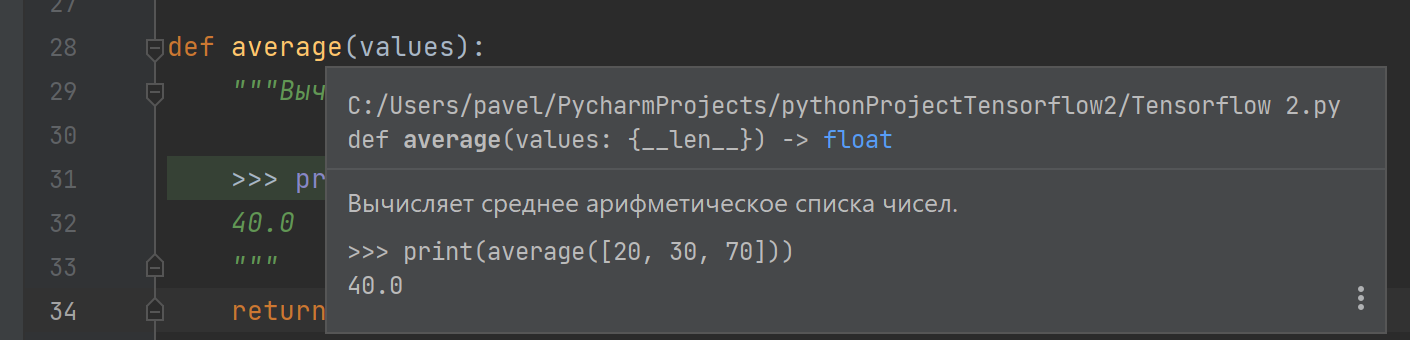

Рис. 2. Вывод комментариев в `PyCharm`

Модуль `unittest` не так прост, как модуль `doctest`, но он позволяет хранить более полный набор тестов в отдельном файле:

In [23]:
import unittest

class TestStringMethods(unittest.TestCase):

    def test_upper(self): #тест функции upper() (преобразует регистр в верхний)
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper()) #проверка что все в верхнем регистре
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # проверяем, что s.split не работает, если разделитель не является строкой
        with self.assertRaises(TypeError):
            s.split(2)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.001s

OK


### Многопоточность и многопроцессорность

Многопоточность – это метод разделения и распределения задач, которые не зависят друг от друга. Потоки можно использовать, например, для распараллеливания выполняемых задач, когда они не зависят друг от друга или связаны при помощи методов синхронизации – как пример, запуск файлового ввода-вывода с вычислениями в другом потоке (т.е. один поток работает с файлом, а другой производит обработку данных этого файла, тем самым обработка данных может начаться раньше, не дожидаясь полного прочтения файла и т.п.).

В следующем коде показано, как модуль может выполнять некоторые задачи в фоновом режиме, пока основная программа продолжает выполняться. В ней мы производим запаковку файла в отдельном потоке в фоновом режиме.

In [24]:
import threading, zipfile

class AsyncZip(threading.Thread):
    def __init__(self, infile, outfile):
        threading.Thread.__init__(self)
        self.infile = infile
        self.outfile = outfile

    def run(self):
        f = zipfile.ZipFile(self.outfile, 'w', zipfile.ZIP_DEFLATED)
        f.write(self.infile)
        f.close()
        print('Готова фоновая zip запаковка файла:', self.infile)

f = open("mydata.txt", "a")
f.write("Теперь в файле больше содержимого!")
f.close()

background = AsyncZip('mydata.txt', 'myarchive.zip')
background.start()
print('Основная программа продолжает работать на переднем плане.')

background.join()    # Дождитесь завершения фоновой задачи
print('Основная программа дождалась завершения фоновой обработки.')

Основная программа продолжает работать на переднем плане.
Готова фоновая zip запаковка файла: mydata.txt
Основная программа дождалась завершения фоновой обработки.


Основная проблема многопоточных приложений – это координация потоков, которые совместно используют данные или другие общие ресурсы. С этой целью модуль потоковой передачи предоставляет ряд примитивов синхронизации: блокировки, события, переменные состояния и семафоры.

Несмотря на то, что эти инструменты являются мощными, незначительные ошибки проектирования могут привести к проблемам, которые трудно воспроизвести. Таким образом, предпочтительный подход к координации задач состоит в том, чтобы сконцентрировать весь доступ к ресурсу в одном потоке, а затем использовать модуль очереди для подачи в этот поток запросов из других потоков. Приложения, использующие объекты `Queue` (с англ. очередь, т.е. в контексте ­­­– использующие очереди) для межпоточного взаимодействия и координации, проще разрабатывать, они более читабельны и надежны.

Модуль `threading` использует потоки, а модуль `multiprocessing` –процессы. Разница в том, что потоки выполняются в одном и том же пространстве памяти (позволяет ``интерпретатору использовать только одно логическое ядро процессора из всех доступных), в то время как процессы имеют отдельную память. При этом каждый процесс может состоять из множества потоков.

Многопоточность при помощи `threading` используется для задач, связанных с вводом-выводом/памятью (например, работы с файлами).

Многопроцессорность при помощи `multiprocessing` достигает полного (истинного) параллелизма и используется для задач, связанных с процессором (для сложных параллельных вычислений).

Пример `multiprocessing`: умножение чисел в массиве на 2:

In [25]:
command="""
import os
from multiprocessing import Process
 
def doubler(number):
    \"""
    Функция умножитель на два
    \"""
    result = number * 2
    proc = os.getpid()
    print('{0} doubled to {1} by process id: {2}\\n'.format(number, result, proc), end="")
 
if __name__ == '__main__':
    import time

    numbers = [5, 10, 15, 20, 25]
    procs = []
    start_time = time.time()
    print ('0сек-> Создание и запуск процессов...', flush=True)
    for index, number in enumerate(numbers):
        proc = Process(target=doubler, args=(number,))
        procs.append(proc)
        proc.start()
            
    print ('%.2fсек-> Все процессы запущены. Ожидание завершения процессов...' % (time.time() - start_time), flush=True)
    for proc in procs:
        proc.join()
        
    print("%.2fсек-> Все процессы завершены, умножение окончено." % (time.time() - start_time))
    print ("Так долго - потому что накладные расходы большие. Умножение работает быстро, а вот создание потоков и процессов-нет... ")
    print("По сути, на создание и ожидание одного процесса уходит около %.2f миллисекунд" % ((time.time() - start_time)/len(procs)*1000))
"""
with open("my_multiprocessing.py", "w", encoding="utf-8") as text_file:
    text_file.write(command)

#запуск программы через системный интерпретатор, а не блокнотовский
!python "my_multiprocessing.py"

0сек-> Создание и запуск процессов...
0.02сек-> Все процессы запущены. Ожидание завершения процессов...
5 doubled to 10 by process id: 3416
10 doubled to 20 by process id: 4748
15 doubled to 30 by process id: 14160
20 doubled to 40 by process id: 6324
25 doubled to 50 by process id: 13400
0.13сек-> Все процессы завершены, умножение окончено.
Так долго - потому что накладные расходы большие. Умножение работает быстро, а вот создание потоков и процессов-нет... 
По сути, на создание и ожидание одного процесса уходит около 25.99 миллисекунд


В данном примере каждый экземпляр функции умножения выполняется отдельным процессом с уникальным номером (или идентификатором, или `id` – часть англ. слова identifier – идентификатор). Т.е. за счет многопоточности мы в итоге могли бы выполнить данную программу ровно в 5 раз быстрее, потому что элементов в массиве 5 и было бы выполнено 5 истинно[2] параллельных умножений, если на компьютере доступно 5 ядер процессора.

[2] <span>&#9757;&#128578;</span> Современные процессоры имеют адаптивный кеш и гипервизор задач, и на самом деле могут выполнять ваши множественные процессы и потоки возможно только лишь на одном ядре, потому так может оказаться быстрее, чем при распределении по ядрам. Нужно грамотно подходить к распределению задач при проектировании вашей программы.

По факту это оказалось не так, потому что само умножение работает быстро, а создание потоков и процессов – работает медленно, и возникают слишком большие накладные расходы. Но если бы наша функция делала что-то более сложное, чем одну операцию умножения, то мы бы увидели почти кратный прирост производительности.

Стоит отметить, что в данном коде сам код программы сохраняется в виде файла и запускается не при помощи `ipython` `Jupyther` интерпретатора, а при помощи системного `Python` интерпретатора. Так сделано, потому что на `Windows` модуль `multiprocessing` имеет трудности при работе в интерактивном интерпретаторе. Этот же код без проблем работает в `Linux` прямо в ячейке ноутбука и без сохранения в отдельный файл. Вызвано особенностями процессов/потоков конкретных операционных систем (см. официальную документацию, доступную по url: https://docs.python.org/3/library/multiprocessing.html). В целом, работать с `multiprocessing` в блокноте особенного смысла и не имеет, так что вряд ли это проблема. Особенно учитывая, что это ограничение есть только с `Windows`.

В завершение занятия удалим все созданные файлы и папки, чтобы не засорять память компьютера:

In [26]:
import os, shutil

files = ['top.py', 'my_multiprocessing.py', 'myarchive.zip', 'mydata.txt']
for f in files:
    if os.path.isfile(f): # если файл существует
        os.remove(f)
        
if os.path.isdir('my_dir'): # если папка существует
    shutil.rmtree('my_dir')

## Контрольные задания и вопросы

1.  Что такое командная оболочка операционной системы, например терминал или командная строка. Как и для чего с ней можно взаимодействовать через `Python`. Приведите пример.

2.  Работа с `glob` и регулярные выражения. Приведите прокомментированные примеры работы с этими двумя модулями и сделайте вывод – в каких случаях их применение может быть полезным при аналитике данных.

3.  Поэкспериментируйте с модулем `datetime` и приведите какой-либо собственный пример кода работы с этой библиотекой.

4.  Многопоточность – приведите примеры, когда она может быть полезна для аналитики данных.